In [337]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda


#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [373]:
weather = pd.read_csv('assets/weather_selected_features.csv', index_col=0)
train = pd.read_csv('assets/clean_train.csv', index_col=0)
test = pd.read_csv('assets/test.csv', index_col=0)

In [374]:
weather.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH
Date,,,,,,,,
2007-05-01,67.5,4.800000,18.816667,0.0,0.0000,26.0,9.40,54.166667
2007-05-02,51.5,4.783333,18.833333,0.0,0.0000,3.0,13.40,73.611111
2007-05-03,57.0,4.766667,18.850000,0.0,0.0000,6.5,12.55,52.777778
2007-05-04,58.0,4.733333,18.866667,0.0,0.0005,7.5,10.60,54.166667
2007-05-05,60.0,4.716667,18.883333,0.0,0.0010,7.0,11.75,40.277778


In [375]:
train.head()

,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,
2007-05-29,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,9,1,0
2007-05-29,CULEX RESTUANS,41,T002,41.954690,-87.800991,9,1,0
2007-05-29,CULEX RESTUANS,62,T007,41.994991,-87.769279,9,1,0
2007-05-29,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,8,1,0
2007-05-29,CULEX RESTUANS,79,T015,41.974089,-87.824812,8,4,0


In [376]:
test.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
Id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [377]:
weather['date'] = weather.index
train['date'] = train.index
test['date'] = test['Date']
print weather.shape
print train.shape
print test.shape

(1472, 9)
(10506, 9)
(116293, 11)


In [378]:
weath_train = pd.merge(weather, train, on='date', how='inner')

In [379]:
weath_test = pd.merge(weather, test, on='date', how='inner')

In [380]:
weath_train.set_index('date')

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
date,,,,,,,,,,,,,,,,
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,9,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,41,T002,41.954690,-87.800991,9,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,62,T007,41.994991,-87.769279,9,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,8,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,79,T015,41.974089,-87.824812,8,4,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,15,T045,41.921600,-87.666455,8,2,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,25,T046,41.891118,-87.654491,8,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX PIPIENS/RESTUANS,11,T048,41.867108,-87.654224,8,1,0
2007-05-29,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,CULEX RESTUANS,11,T048,41.867108,-87.654224,8,2,0


In [381]:
weath_test.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,date,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,2008-06-11,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,2008-06-11,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,2008-06-11,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,2008-06-11,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,2008-06-11,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [382]:
weath_train.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,date,Species,Block,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,2007-05-29,CULEX PIPIENS/RESTUANS,41,T002,41.954690,-87.800991,9,1,0
1,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,2007-05-29,CULEX RESTUANS,41,T002,41.954690,-87.800991,9,1,0
2,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,2007-05-29,CULEX RESTUANS,62,T007,41.994991,-87.769279,9,1,0
3,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,2007-05-29,CULEX PIPIENS/RESTUANS,79,T015,41.974089,-87.824812,8,1,0
4,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,2007-05-29,CULEX RESTUANS,79,T015,41.974089,-87.824812,8,4,0


In [383]:
weath_test.to_csv('assets/weather_test.csv')

In [384]:
weath_test = pd.read_csv('assets/weather_test.csv', index_col=0)

In [385]:
weath_train.to_csv('assets/weather_train.csv')

In [386]:
weath_train = pd.read_csv('assets/weather_train.csv', index_col=0)

In [387]:
weath_train = weath_train.drop('date', 1)

In [388]:
weath_train = weath_train.drop('AddressAccuracy', 1)

In [389]:
weath_train = weath_train.drop('Latitude', 1)

In [390]:
weath_train = weath_train.drop('Longitude', 1)

In [391]:
weath_train = weath_train[weath_train.Trap != 'T035']

In [392]:
weath_train = weath_train[weath_train.Trap != 'T009']

In [393]:
weath_train = weath_train.drop('NumMosquitos', 1)

In [394]:
weath_train.Block = weath_train.Block.astype(str)

In [395]:
weath_train.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Species,Block,Trap,WnvPresent
0,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,CULEX PIPIENS/RESTUANS,41,T002,0
1,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,CULEX RESTUANS,41,T002,0
2,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,CULEX RESTUANS,62,T007,0
3,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,CULEX PIPIENS/RESTUANS,79,T015,0
4,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,CULEX RESTUANS,79,T015,0


In [405]:
weath_test = weath_test.drop('Address', 1)

In [406]:
weath_test = weath_test.drop('Date', 1)

In [407]:
weath_test = weath_test.drop('date', 1)

In [408]:
weath_test = weath_test.drop('Street', 1)

In [409]:
weath_test = weath_test.drop('AddressNumberAndStreet', 1)

In [410]:
weath_test = weath_test.drop('Latitude', 1)

In [411]:
weath_test = weath_test.drop('Longitude', 1)

In [412]:
weath_test = weath_test.drop('AddressAccuracy', 1)

In [413]:
weath_test.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Species,Block,Trap
0,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,CULEX PIPIENS/RESTUANS,41,T002
1,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,CULEX RESTUANS,41,T002
2,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,CULEX PIPIENS,41,T002
3,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,CULEX SALINARIUS,41,T002
4,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,CULEX TERRITANS,41,T002


In [414]:
weath_test.Block = weath_test.Block.astype(str)

In [415]:
dumb_test = pd.get_dummies(weath_test)

In [416]:
dumb_test.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,0,1,...,0,0,0,0,0,0,0,0,0,0
3,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,0,0,...,0,0,0,0,0,0,0,0,0,0
4,75.0,4.266667,19.433333,0.0,0.0,18.0,10.2,45.833333,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
dumb_test.to_csv('assets/dumb_test.csv')

In [371]:
dumb = pd.get_dummies(weath_train)

In [372]:
dumb.head()

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,WnvPresent,Species_CULEX ERRATICUS,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,0,0,...,0,0,0,0,0,0,0,0,0,0
1,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,0,0,...,0,0,0,0,0,0,0,0,0,0
4,75.5,4.35,19.283333,0.0,0.0,17.0,6.95,52.777778,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
print len(weath_train.Species.value_counts()) + len(weath_train.Trap.value_counts())

143


In [53]:
dumb.to_csv('assets/dumb.csv')

In [54]:
dumb = pd.read_csv('assets/dumb.csv', index_col=0)
dumb.columns[:50:]

Index([u'Tavg', u'Sunrise', u'Sunset', u'SnowFall', u'PrecipTotal',
       u'ResultDir', u'AvgSpeed', u'RH', u'Block', u'NumMosquitos',
       u'WnvPresent', u'Species_CULEX ERRATICUS', u'Species_CULEX PIPIENS',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS',
       u'Species_CULEX TERRITANS', u'Trap_T001', u'Trap_T002', u'Trap_T003',
       u'Trap_T004', u'Trap_T005', u'Trap_T006', u'Trap_T007', u'Trap_T008',
       u'Trap_T009', u'Trap_T011', u'Trap_T012', u'Trap_T013', u'Trap_T014',
       u'Trap_T015', u'Trap_T016', u'Trap_T017', u'Trap_T018', u'Trap_T019',
       u'Trap_T025', u'Trap_T027', u'Trap_T028', u'Trap_T030', u'Trap_T031',
       u'Trap_T033', u'Trap_T034', u'Trap_T035', u'Trap_T036', u'Trap_T037',
       u'Trap_T039', u'Trap_T040', u'Trap_T043', u'Trap_T044'],
      dtype='object')

In [195]:
X = dumb.drop('WnvPresent', 1)
y = dumb.WnvPresent

In [91]:
[i/10.0 for i in range(0,5)]

[0.0, 0.1, 0.2, 0.3, 0.4]

In [196]:
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,12,1)
}

param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

param_test4 = { 
 'subsample': [i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

param_test6 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [197]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation, metrics 
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)


Model Report
Accuracy : 0.9495
AUC Score (Train): 0.901157
'max_depth': 3, 'min_child_weight': 2


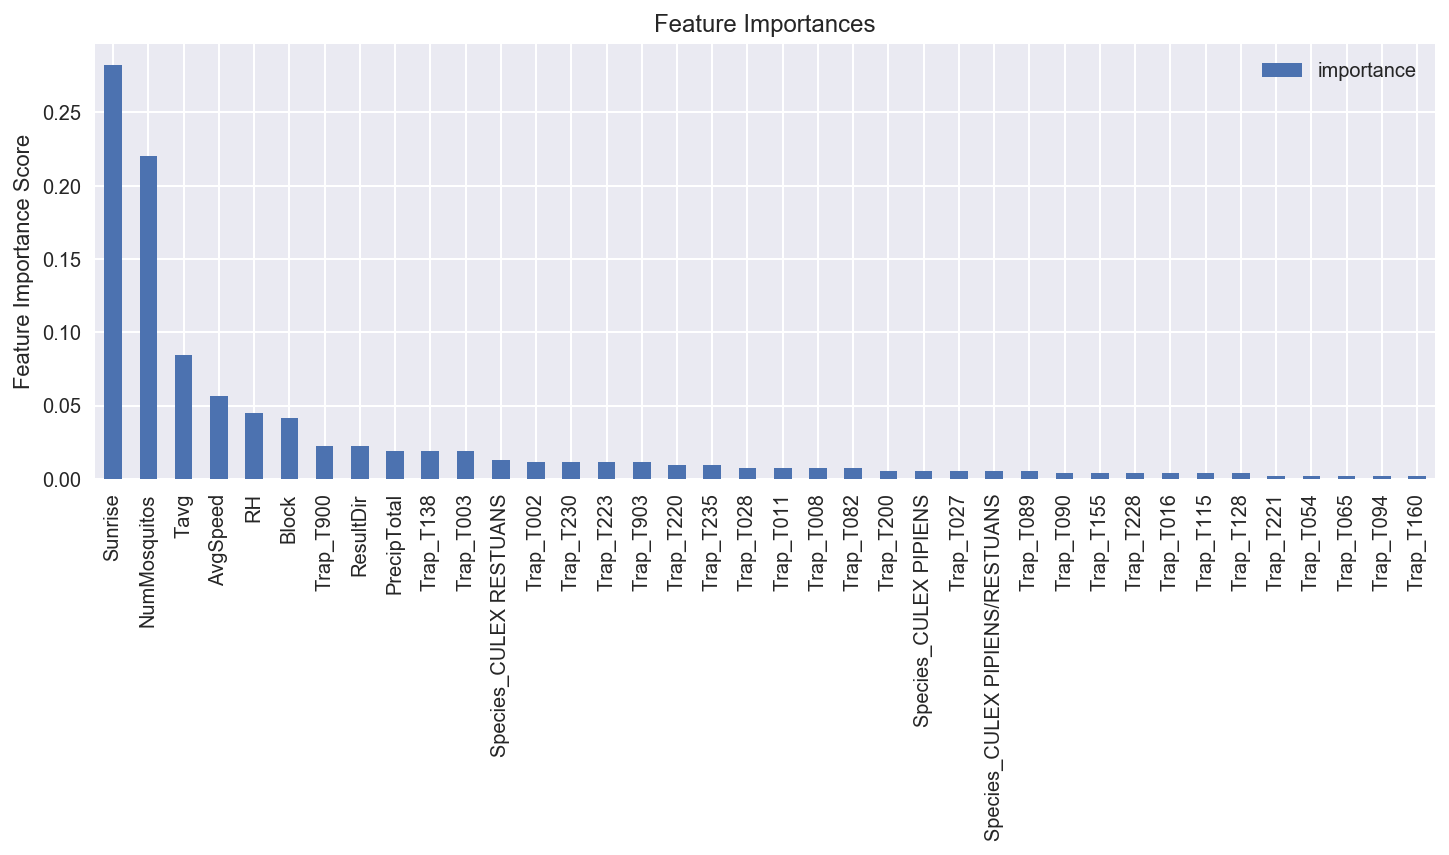

In [198]:



xgb = XGBClassifier()


grid = GridSearchCV(xgb, param_test1, cv=3)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


In [247]:

predictions


array([[  9.89e-01,   1.14e-02],
       [  9.91e-01,   9.09e-03],
       [  9.99e-01,   1.42e-03],
       [  9.99e-01,   8.79e-04],
       [  9.36e-01,   6.40e-02],
       [  8.95e-01,   1.05e-01],
       [  7.97e-01,   2.03e-01],
       [  9.64e-01,   3.55e-02],
       [  9.53e-01,   4.67e-02],
       [  9.35e-01,   6.47e-02],
       [  9.90e-01,   9.72e-03],
       [  7.69e-01,   2.31e-01],
       [  9.14e-01,   8.61e-02],
       [  9.89e-01,   1.09e-02],
       [  8.08e-01,   1.92e-01],
       [  9.18e-01,   8.18e-02],
       [  9.99e-01,   6.08e-04],
       [  8.63e-01,   1.37e-01],
       [  6.82e-01,   3.18e-01],
       [  9.15e-01,   8.48e-02],
       [  9.18e-01,   8.24e-02],
       [  9.95e-01,   5.50e-03],
       [  9.67e-01,   3.26e-02],
       [  9.58e-01,   4.15e-02],
       [  9.85e-01,   1.50e-02],
       [  9.74e-01,   2.57e-02],
       [  8.42e-01,   1.58e-01],
       [  8.11e-01,   1.89e-01],
       [  9.94e-01,   6.21e-03],
       [  7.87e-01,   2.13e-01],
       [  

In [248]:
predictions = best_xgb.predict_proba(X_test)

sample = pd.DataFrame(predictions[1], columns=['WnvPresent'])

sample.to_csv('beat_the_benchmark.csv', index=False)


Model Report
Accuracy : 0.9473
AUC Score (Train): 0.897776
'gamma': 0.2


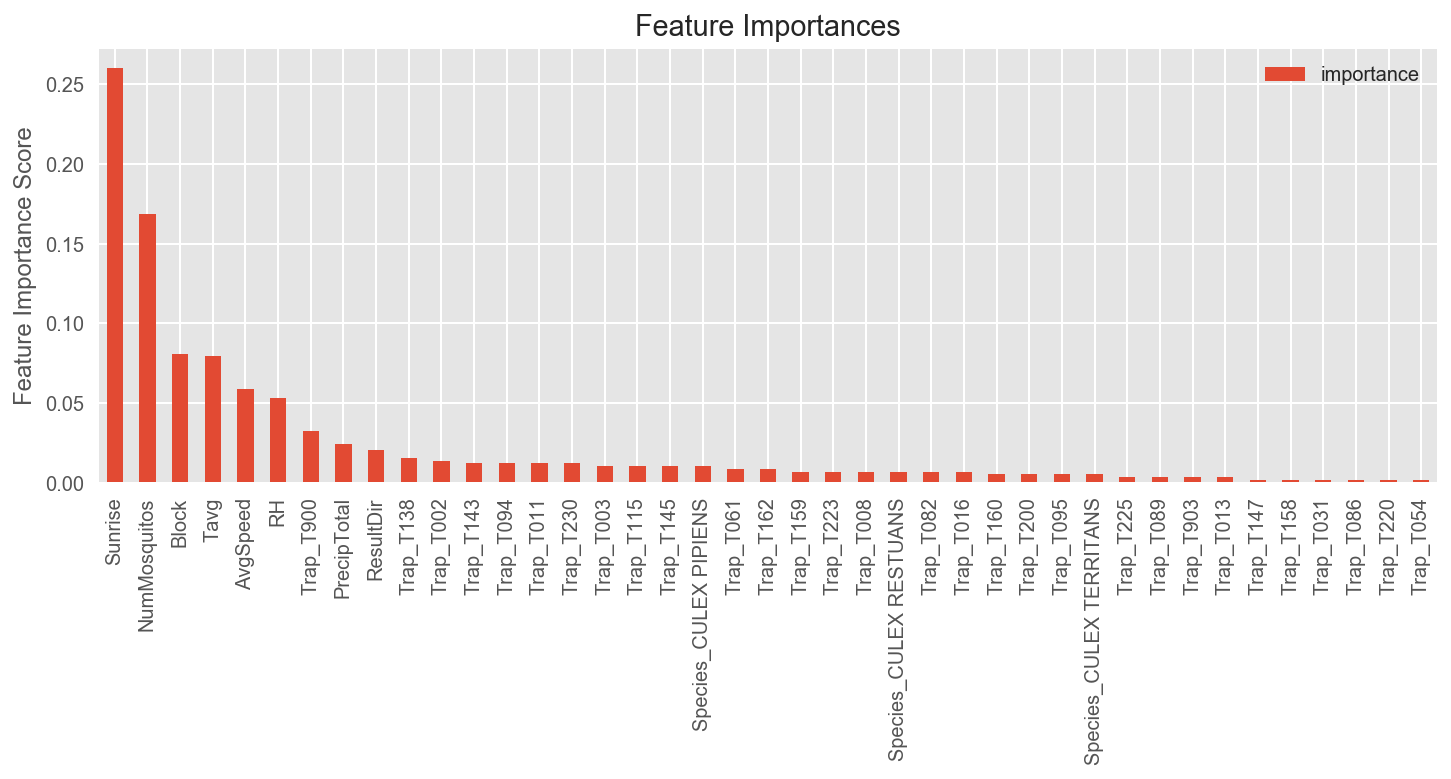

In [59]:
grid = GridSearchCV(xgb, param_test2)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9478
AUC Score (Train): 0.900952
'subsample': 0.8, 'colsample_bytree': 0.9


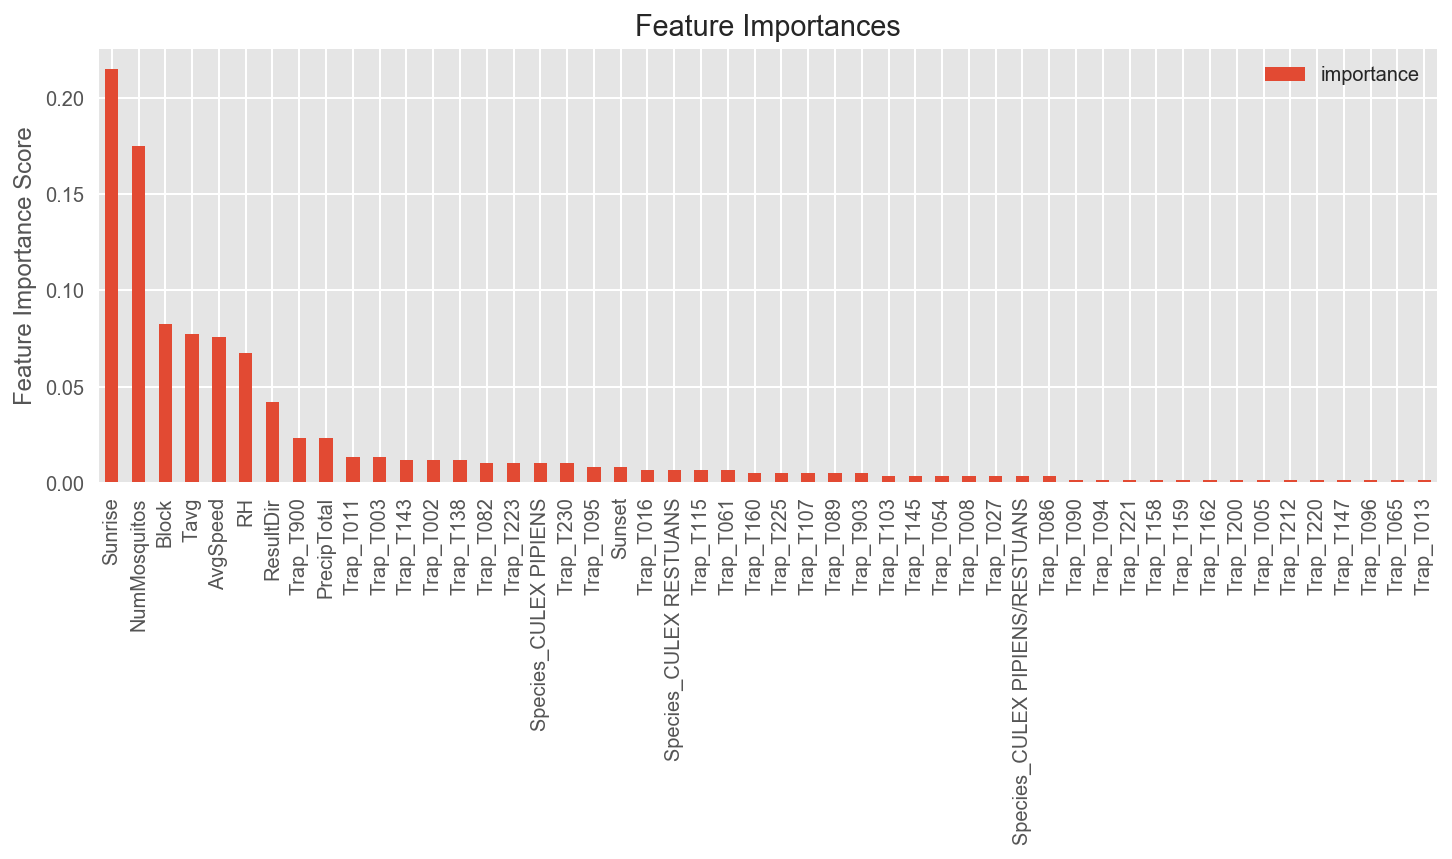

In [60]:
grid = GridSearchCV(xgb, param_test3)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9478
AUC Score (Train): 0.900523
'subsample': 0.75, 'colsample_bytree': 0.85


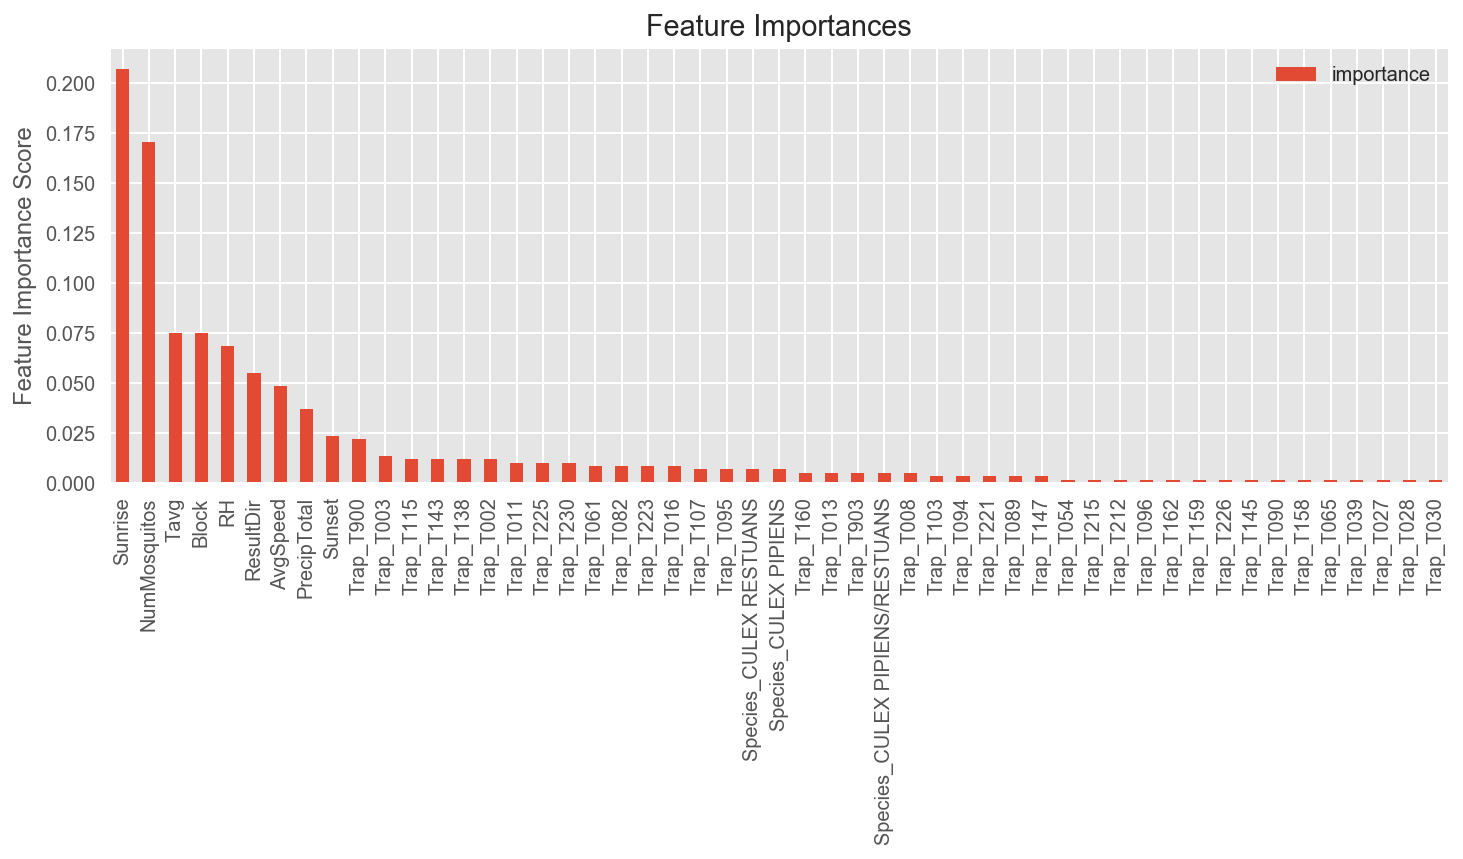

In [61]:
grid = GridSearchCV(xgb, param_test4)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9471
AUC Score (Train): 0.826690
'reg_alpha': 100


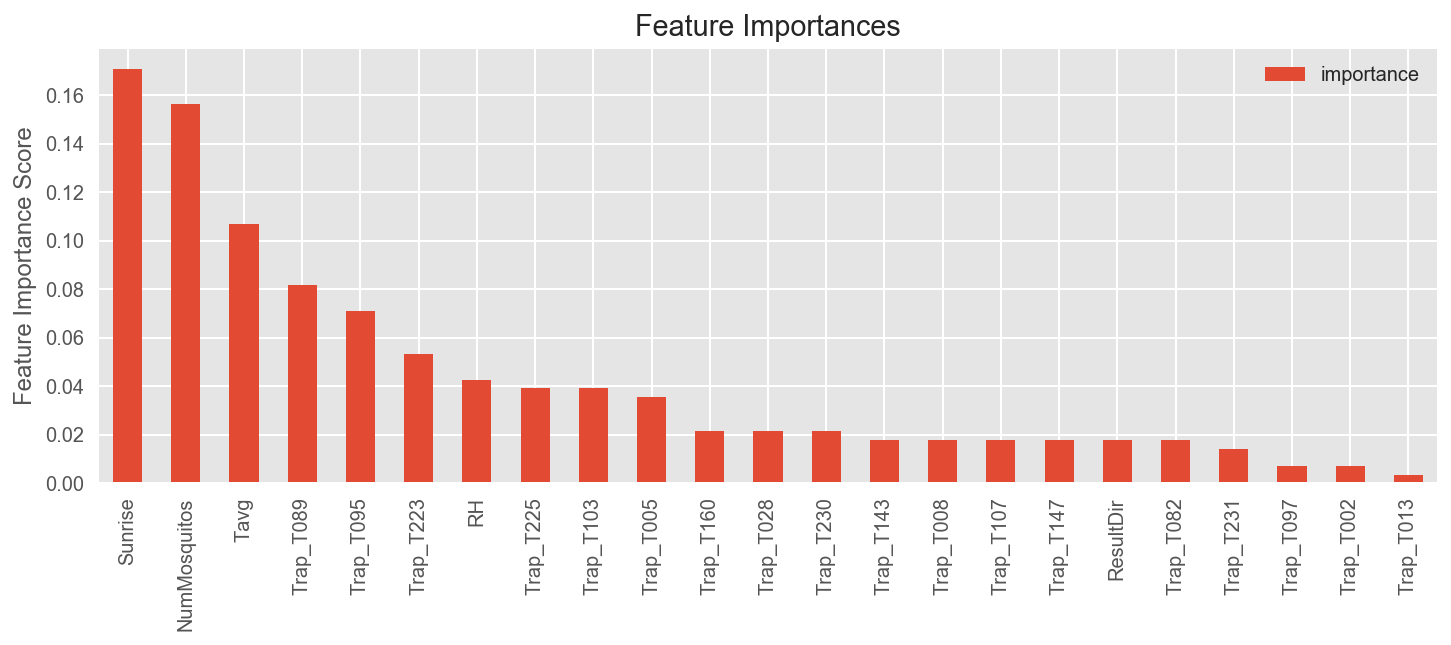

In [62]:
grid = GridSearchCV(xgb, param_test5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9471
AUC Score (Train): 0.898001
'reg_alpha': 0.01


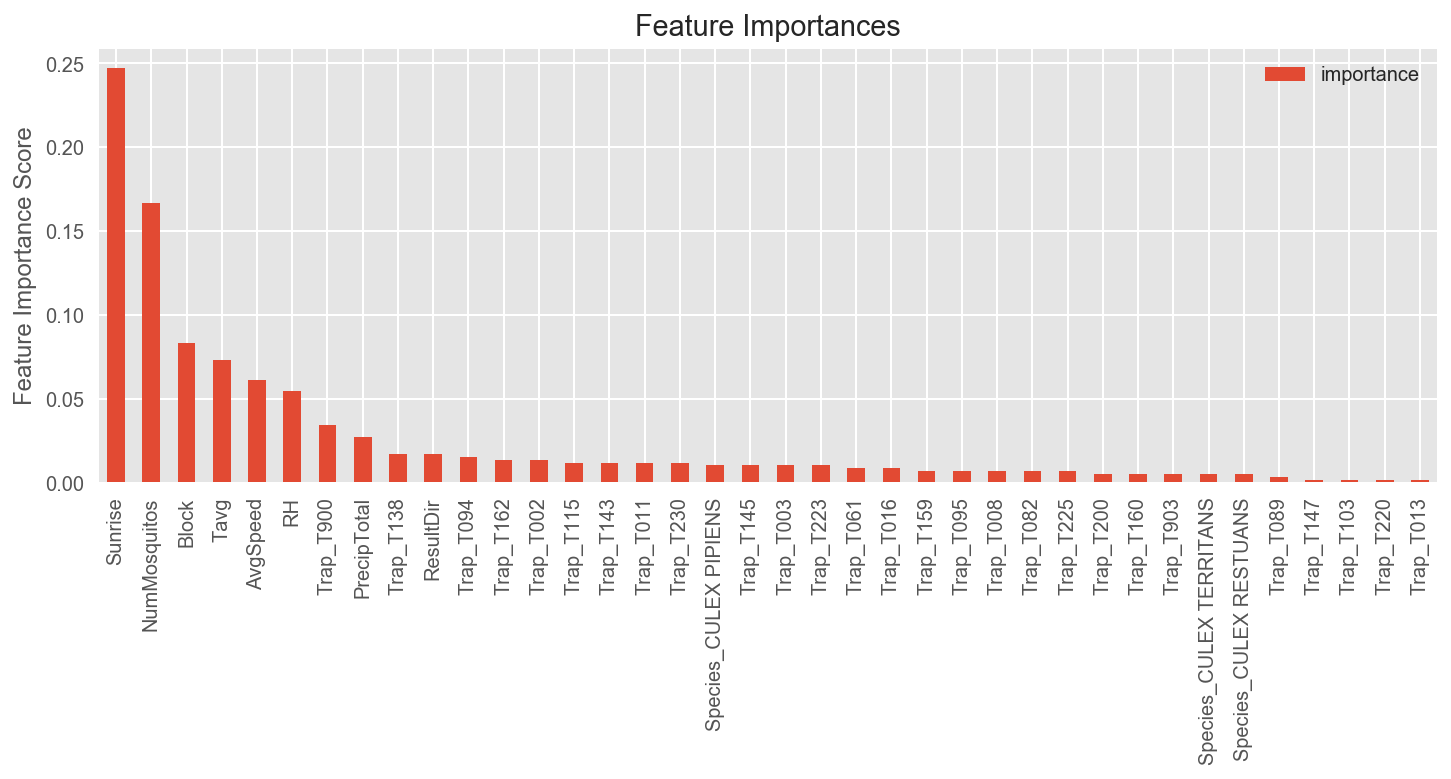

In [63]:
grid = GridSearchCV(xgb, param_test6)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.9476
AUC Score (Train): 0.893778


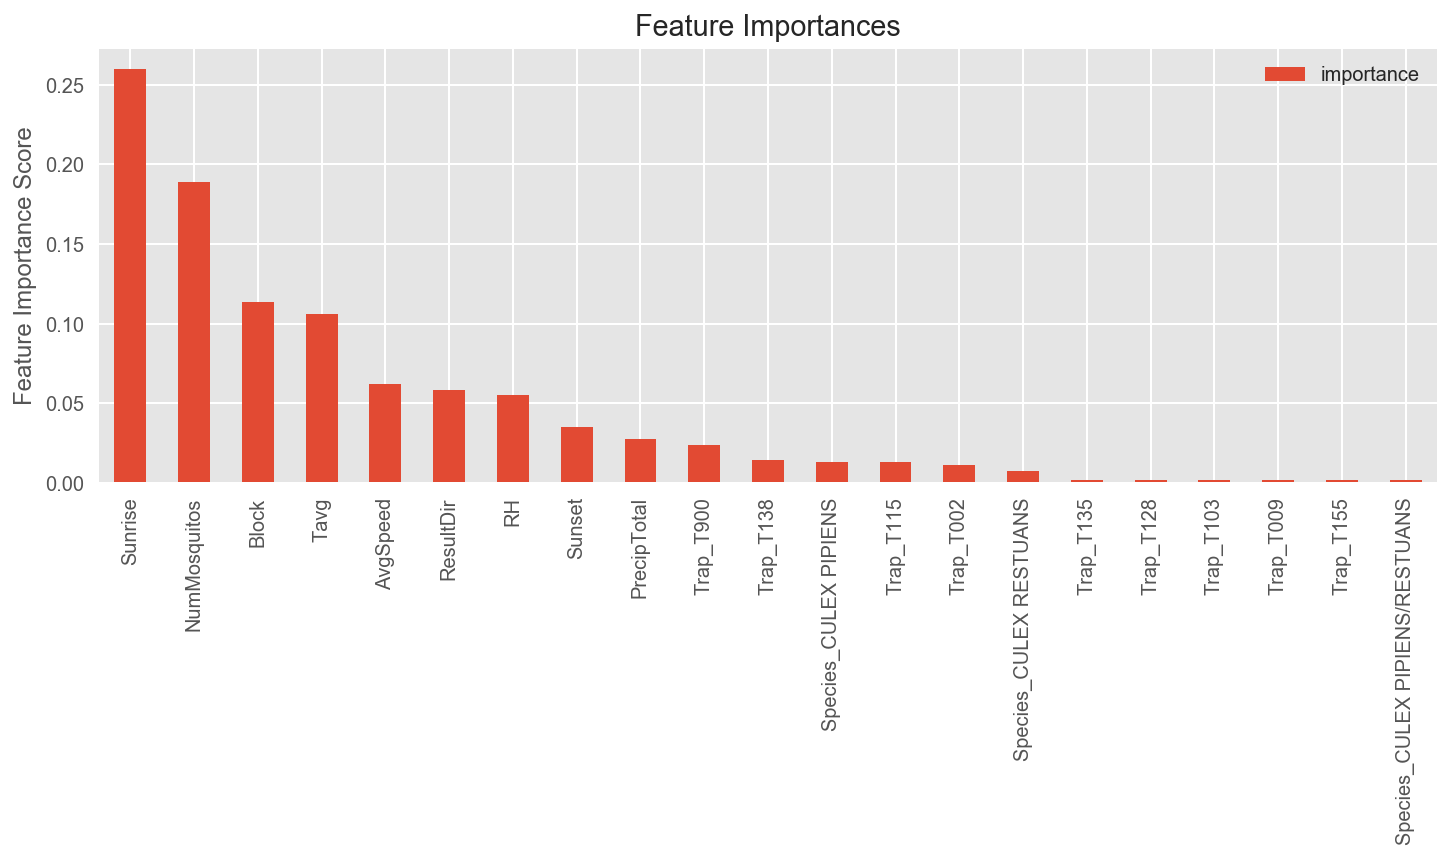

In [69]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:logistic', random_state=0,
       reg_alpha = 0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [64]:
grid.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
wnv = dumb[dumb['WnvPresent'] == 0]
w1nv = dumb[dumb['WnvPresent'] == 1]

In [71]:
wnv

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Block,NumMosquitos,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,41,1,...,0,0,0,0,0,0,0,0,0,0
1,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,41,1,...,0,0,0,0,0,0,0,0,0,0
2,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,62,1,...,0,0,0,0,0,0,0,0,0,0
3,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,79,1,...,0,0,0,0,0,0,0,0,0,0
4,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,79,4,...,0,0,0,0,0,0,0,0,0,0
5,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,15,2,...,0,0,0,0,0,0,0,0,0,0
6,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,25,1,...,0,0,0,0,0,0,0,0,0,0
7,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,11,1,...,0,0,0,0,0,0,0,0,0,0
8,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,11,2,...,0,0,0,0,0,0,0,0,0,0
9,75.5,4.350000,19.283333,0.0,0.000,17.0,6.95,52.777778,11,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
print 'total', len(dumb)
print 'No wnv', len(wnv)
print 'wnv', len(w1nv)

total 10506
No wnv 9955
wnv 551


In [73]:
import random

print len(wnv.ix[random.sample(wnv.index, 551)])

print len(wnv)

551
9955


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
wnv = wnv.ix[random.sample(wnv.index, 551)]

In [75]:
balance = pd.concat([wnv, w1nv])

In [76]:
balance

,Tavg,Sunrise,Sunset,SnowFall,PrecipTotal,ResultDir,AvgSpeed,RH,Block,NumMosquitos,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
5828,62.0,5.550000,17.966667,0.0,0.0000,6.5,4.80,70.833333,13,4,...,0,0,0,0,0,0,0,0,0,0
9309,71.5,4.750000,19.183333,0.0,0.0000,29.5,7.45,55.555556,10,6,...,0,0,0,0,0,0,0,0,1,0
1289,80.5,4.750000,19.183333,0.0,0.0000,11.0,3.90,50.000000,82,4,...,0,0,0,0,0,0,0,0,0,0
7976,55.0,5.666667,17.800000,0.0,0.0100,36.0,6.70,72.222222,37,5,...,0,0,0,0,0,0,0,0,0,0
6472,80.0,4.433333,19.466667,0.0,0.2600,24.5,8.25,73.611111,43,1,...,0,0,0,0,0,0,0,0,0,0
9855,73.0,5.100000,18.716667,0.0,0.2950,23.5,7.00,81.944444,65,5,...,0,0,0,0,0,0,0,0,0,0
3464,80.0,5.683333,17.766667,0.0,0.0000,19.0,11.20,51.388889,28,1,...,0,0,0,0,0,0,0,0,0,0
42,56.5,4.283333,19.383333,0.0,0.3450,4.0,7.85,75.000000,17,2,...,0,0,0,0,0,0,0,0,0,0
6713,79.0,4.483333,19.433333,0.0,0.0005,9.5,6.75,47.222222,58,7,...,0,0,0,0,0,0,0,0,0,0
8532,75.5,4.316667,19.516667,0.0,0.0805,30.0,10.35,58.333333,10,17,...,0,0,0,0,0,0,0,0,1,0


In [77]:
baseline = len(balance[balance['WnvPresent'] == 1]['WnvPresent']) / float(len(balance))
baseline

0.5

In [78]:
balance.to_csv('baseline_fifty.csv')

In [199]:
eda.eda(balance)

missing values 
Tavg                              0
Sunrise                           0
Sunset                            0
SnowFall                          0
PrecipTotal                       0
ResultDir                         0
AvgSpeed                          0
RH                                0
Block                             0
NumMosquitos                      0
WnvPresent                        0
Species_CULEX ERRATICUS           0
Species_CULEX PIPIENS             0
Species_CULEX PIPIENS/RESTUANS    0
Species_CULEX RESTUANS            0
Species_CULEX SALINARIUS          0
Species_CULEX TARSALIS            0
Species_CULEX TERRITANS           0
Trap_T001                         0
Trap_T002                         0
Trap_T003                         0
Trap_T004                         0
Trap_T005                         0
Trap_T006                         0
Trap_T007                         0
Trap_T008                         0
Trap_T009                         0
Trap_T011   

In [200]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
param_test1 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,12,1)
}

param_test2 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'gamma':[i/10.0 for i in range(0,5)]
}

param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

param_test4 = {   
 'subsample': [i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

param_test5 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

param_test6 = {'subsample': [0.85], 'colsample_bytree': [0.8],
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}



Model Report
Accuracy : 0.8789
AUC Score (Train): 0.961194
'subsample': 0.85, 'colsample_bytree': 0.8, 'max_depth': 7, 'min_child_weight': 6


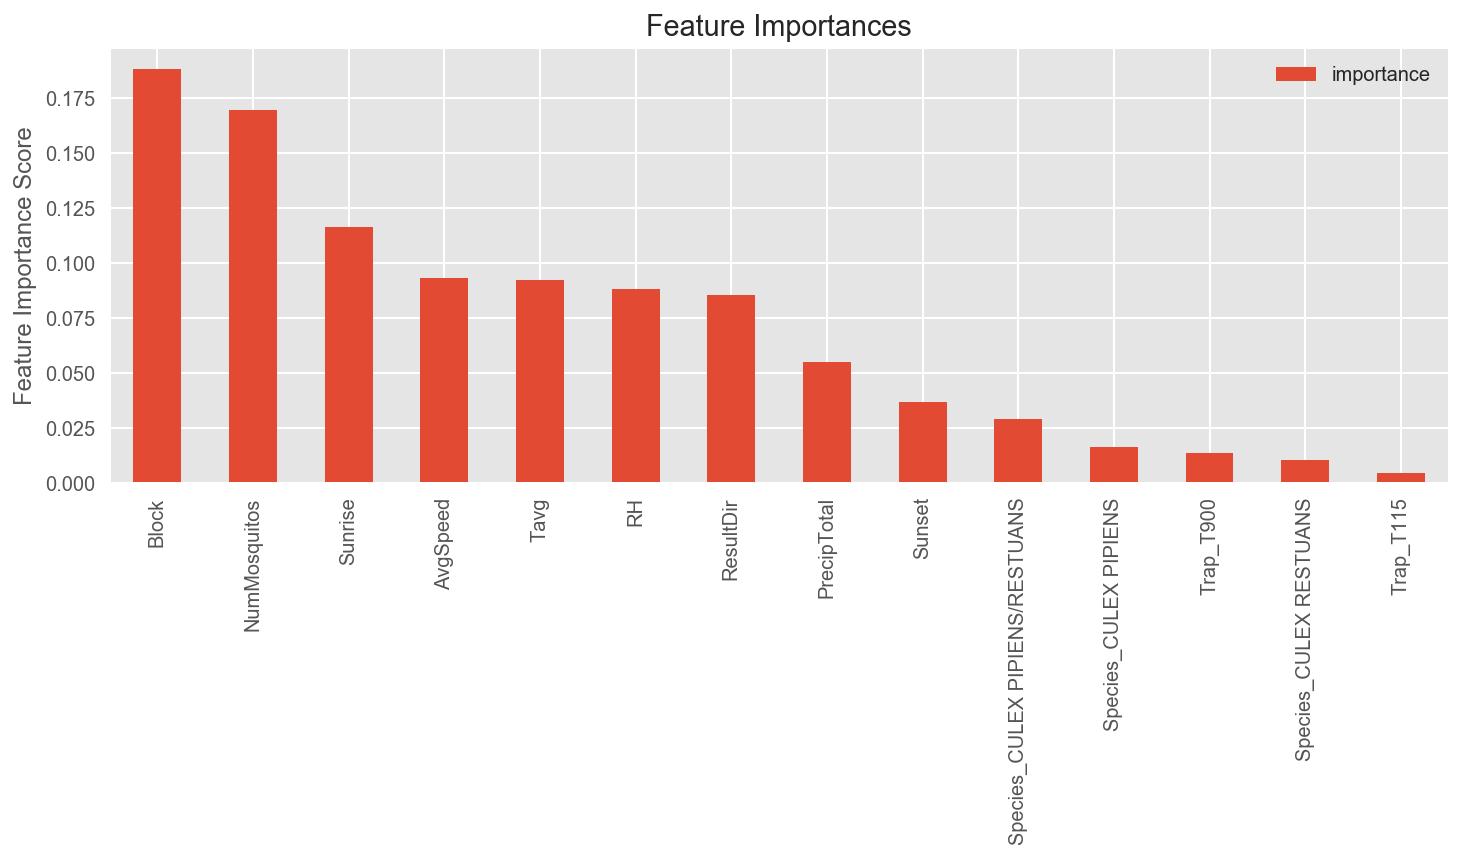

In [83]:
xgb = XGBClassifier()


grid = GridSearchCV(xgb, param_test1)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param



Model Report
Accuracy : 0.8426
AUC Score (Train): 0.931996
'subsample': 0.85, 'colsample_bytree': 0.8, 'gamma': 0.0


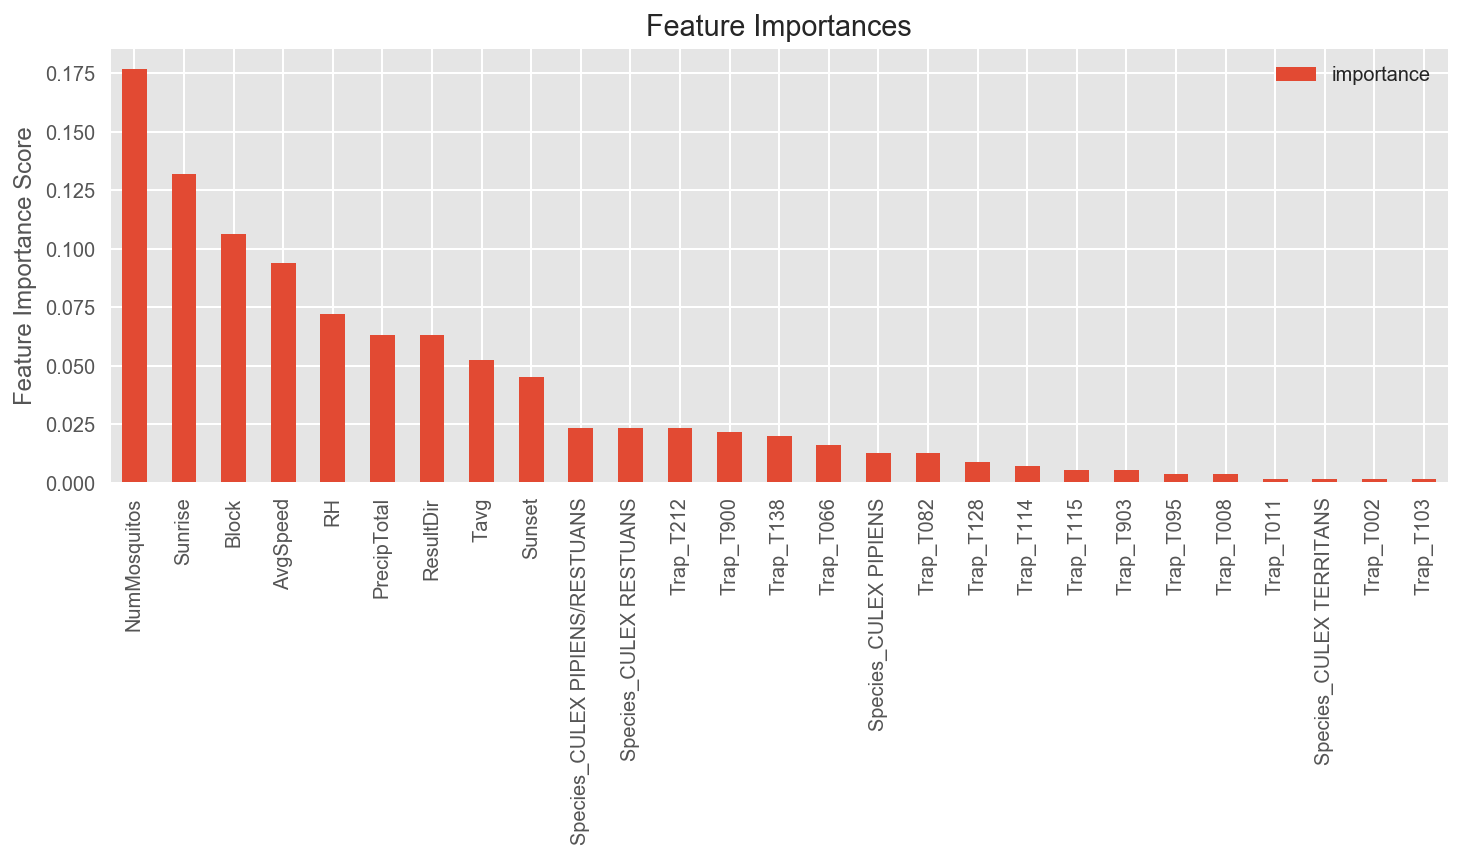

In [84]:
grid = GridSearchCV(xgb, param_test2)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8438
AUC Score (Train): 0.935687
'subsample': 0.7, 'colsample_bytree': 0.8


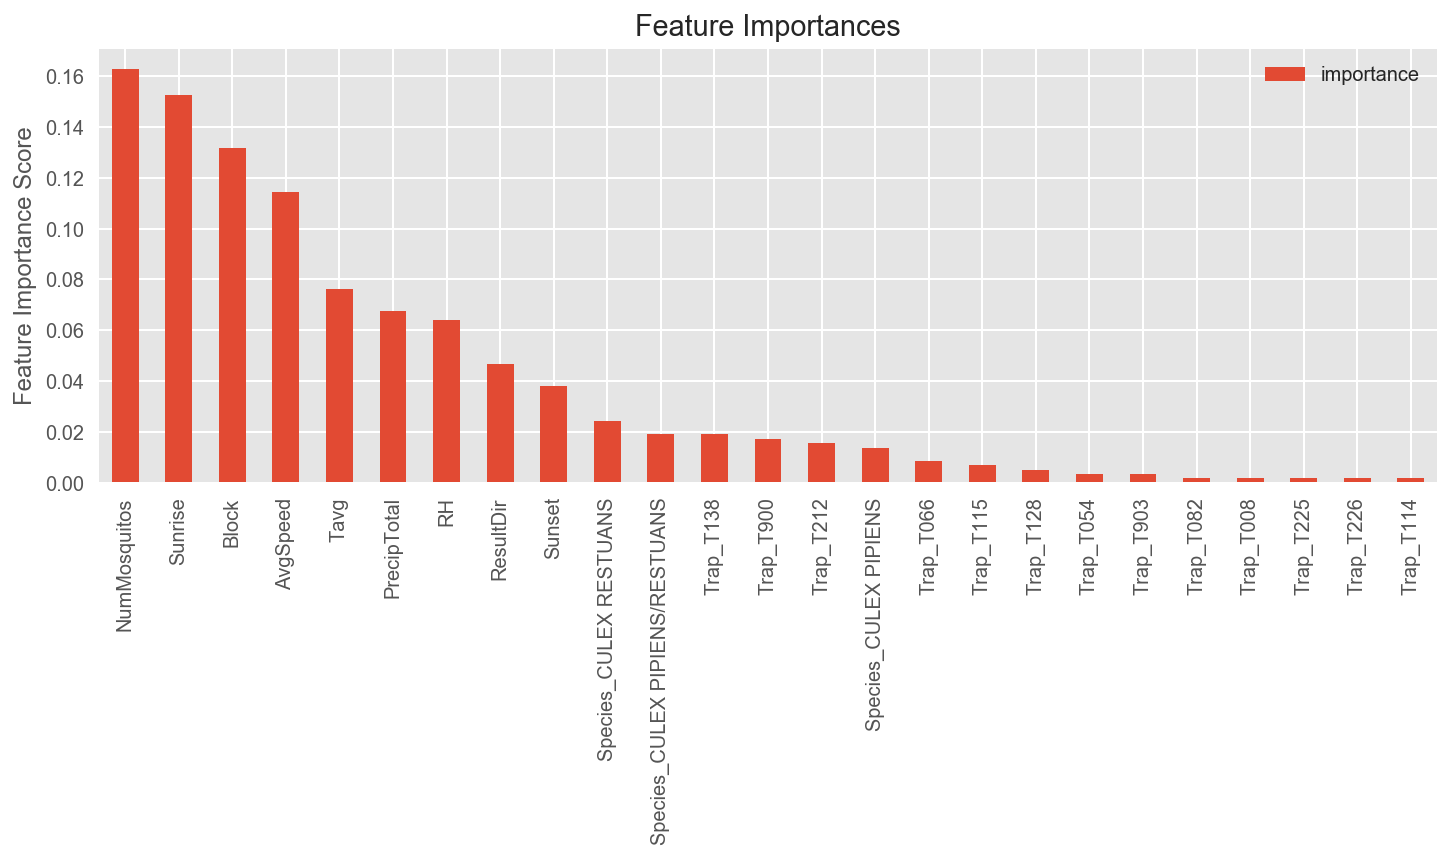

In [85]:
grid = GridSearchCV(xgb, param_test3)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.845
AUC Score (Train): 0.932985
'subsample': 0.85, 'colsample_bytree': 0.75


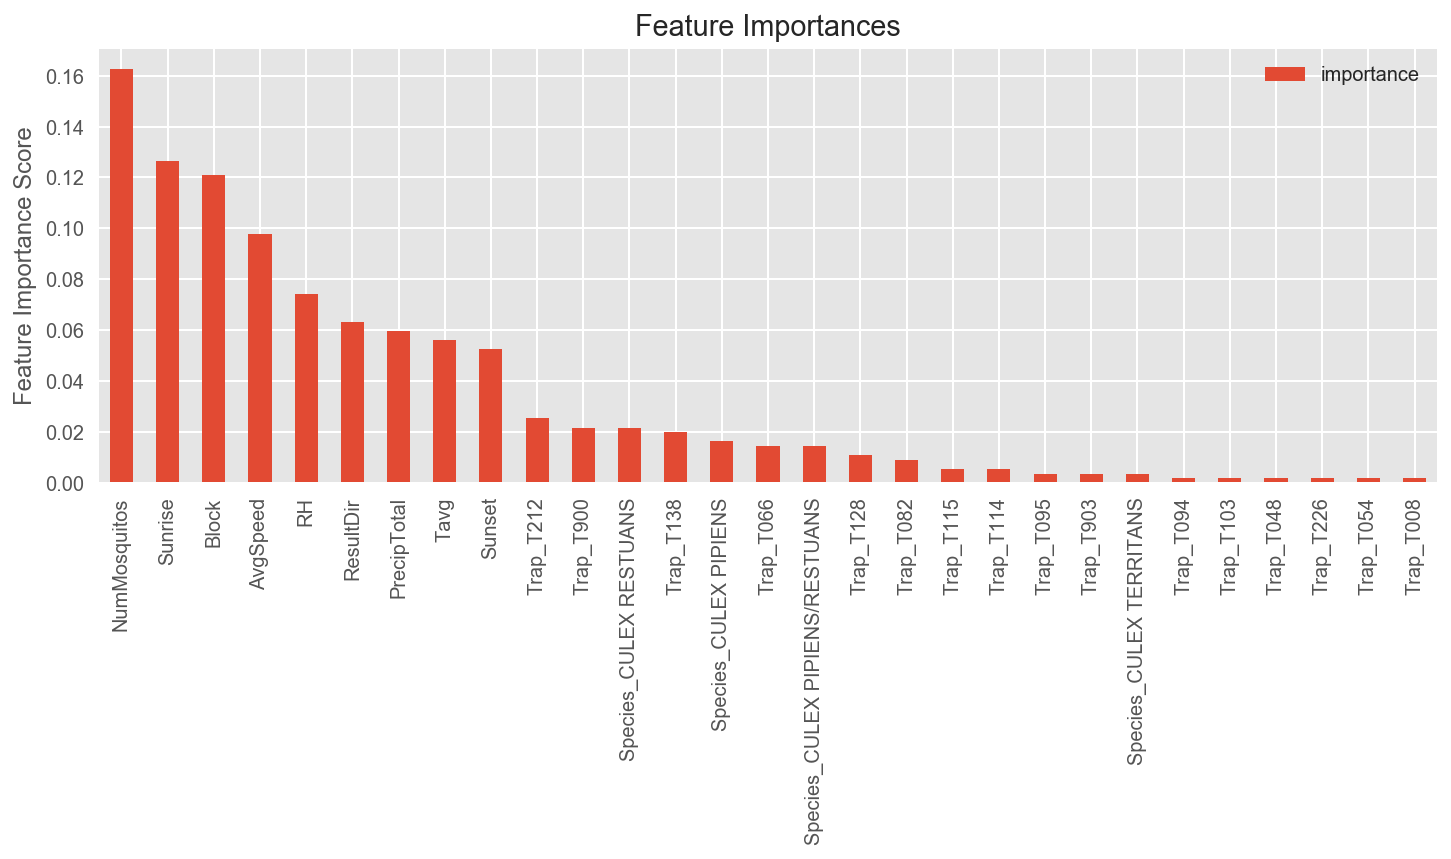

In [86]:
grid = GridSearchCV(xgb, param_test4)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8426
AUC Score (Train): 0.931996
'subsample': 0.85, 'reg_alpha': 1e-05, 'colsample_bytree': 0.8


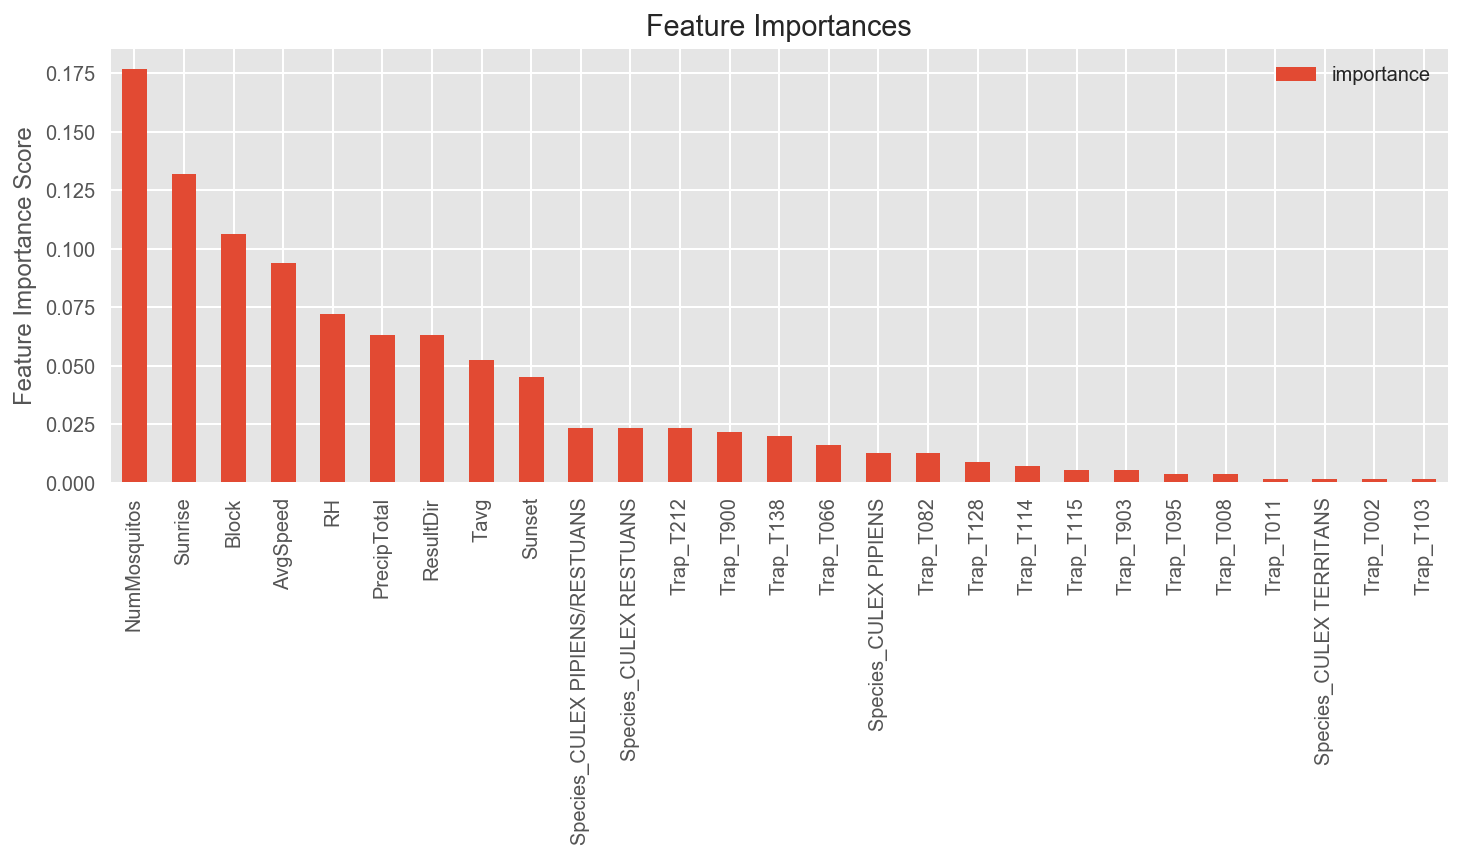

In [87]:
grid = GridSearchCV(xgb, param_test5)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8426
AUC Score (Train): 0.931996
'subsample': 0.85, 'reg_alpha': 0, 'colsample_bytree': 0.8


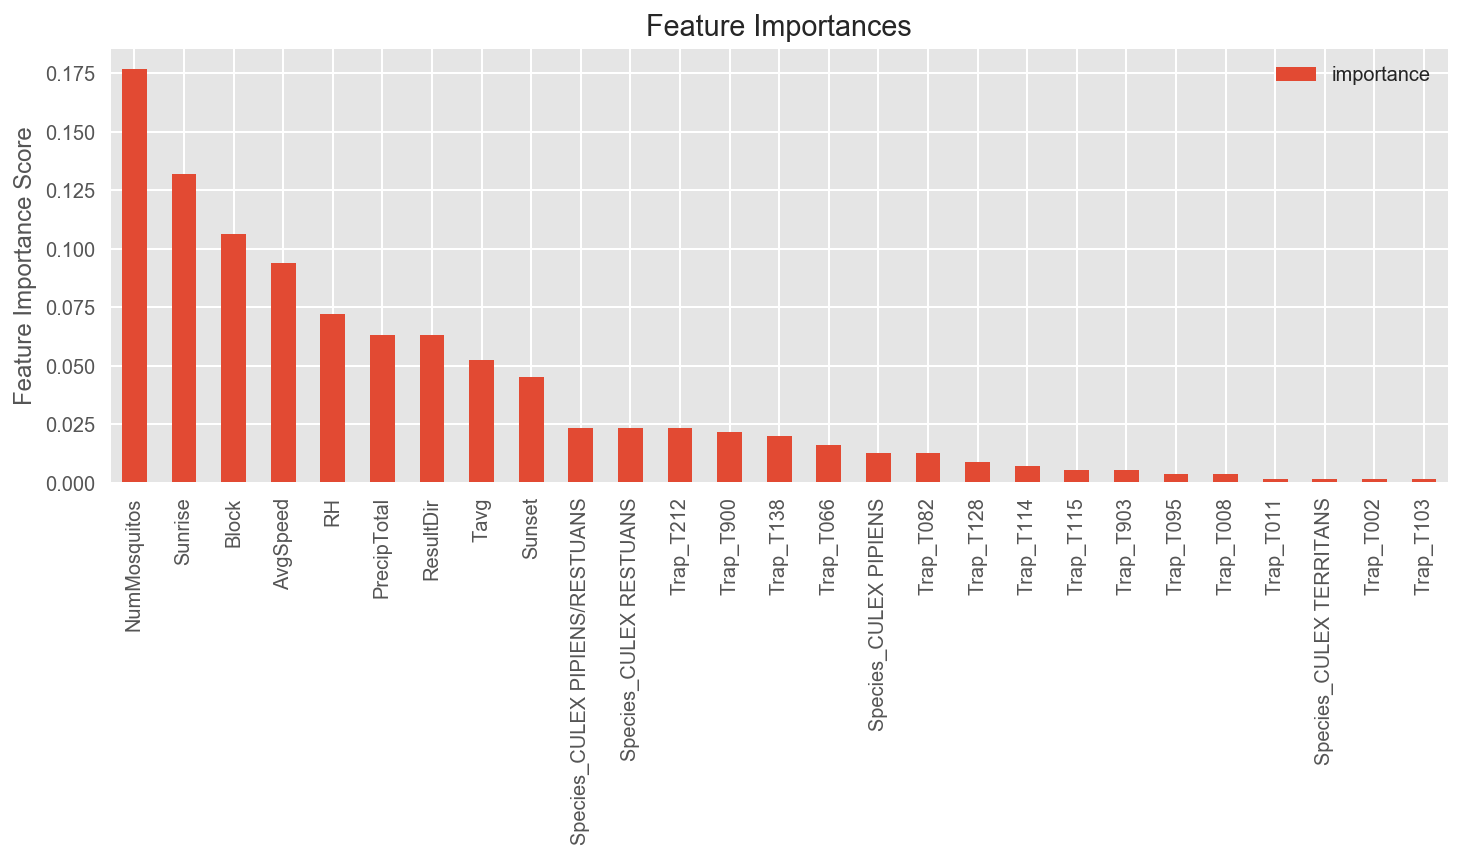

In [88]:
grid = GridSearchCV(xgb, param_test6)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')


param = str(grid.best_params_)
param = param.replace('{', '')
param = param.replace('}', '')
print param


Model Report
Accuracy : 0.8971
AUC Score (Train): 0.971558


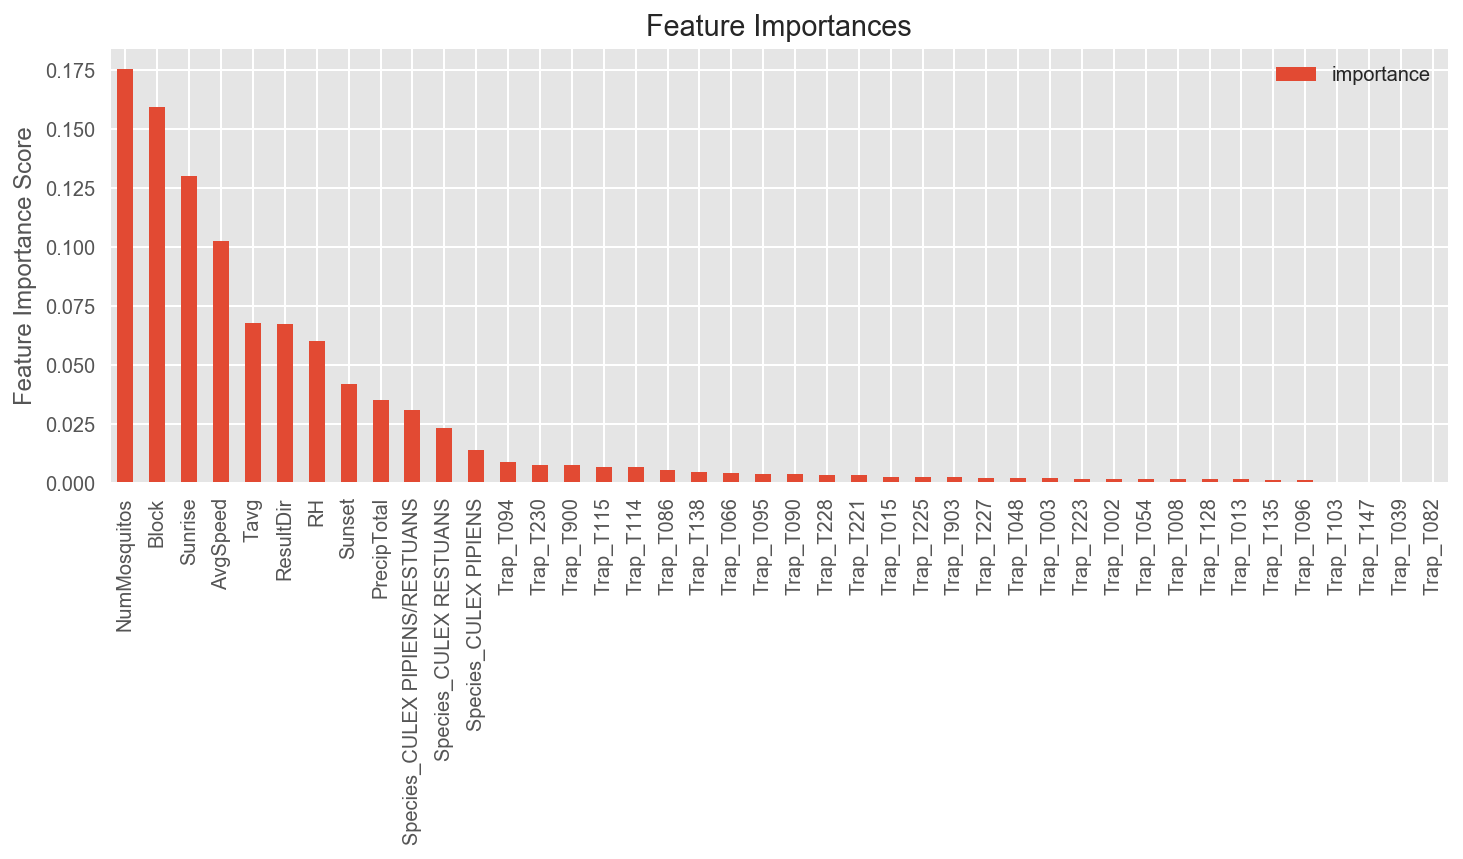

In [118]:
best_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=4, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:tweedie', random_state=0,
       reg_alpha = 0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.85)

best_xgb.fit(X_train, y_train)

#Predict training set:
X_train_predictions = best_xgb.predict(X_train)
X_train_predprob = best_xgb.predict_proba(X_train)[:,1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(y_train.values, X_train_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, X_train_predprob)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [108]:
from sklearn.linear_model import LogisticRegression

penalties = ['l1', 'l2']
range_C = [10 ** i for i in range(-3, 3)]
class_weights = [None, 'balanced']

params_grid = dict(penalty=penalties, 
              C=range_C, 
              class_weight=class_weights)

logit = LogisticRegression()

grid = GridSearchCV(xgb, param_grid)
grid.fit(X_train, y_train)


best_logit = grid.best_estimator_

best_logit = best_logit.fit(X_train, y_train)
score = best_logit.score(X_test, y_test)
print "{} Score:\t{:0.3}".format('Logitistic Classifier', score.mean().round(3))

Logitistic Classifier Score:	0.812


In [110]:
logit_importance = pd.DataFrame(best_logit.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
logit_importance

,importance
NumMosquitos,0.143649
Sunrise,0.137601
Tavg,0.102319
Longitude,0.095766
Latitude,0.081149
Block,0.047883
RH,0.047379
AvgSpeed,0.045867
Trap_T094,0.032762
ResultDir,0.028226


In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

def svm_cm(X, y, kernel): 
    classifier = svm.SVC(kernel=kernel)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    print kernel + ' SVM Classifier: ', cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy').mean()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    print cnf_matrix
    #Not normalized dconfusion matrix
    #Y axis actual, x axis predicted
    print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
    print 'Precision: ', precision_score(y_test, y_pred, average='macro')
    print 
    print (classification_report(y_test, y_pred))
    return classifier

In [120]:
feat_imp.index

Index([u'NumMosquitos', u'Block', u'Sunrise', u'AvgSpeed', u'Tavg',
       u'ResultDir', u'RH', u'Sunset', u'PrecipTotal',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX PIPIENS', u'Trap_T094', u'Trap_T230', u'Trap_T900',
       u'Trap_T115', u'Trap_T114', u'Trap_T086', u'Trap_T138', u'Trap_T066',
       u'Trap_T095', u'Trap_T090', u'Trap_T228', u'Trap_T221', u'Trap_T015',
       u'Trap_T225', u'Trap_T903', u'Trap_T227', u'Trap_T048', u'Trap_T003',
       u'Trap_T223', u'Trap_T002', u'Trap_T054', u'Trap_T008', u'Trap_T128',
       u'Trap_T013', u'Trap_T135', u'Trap_T096', u'Trap_T103', u'Trap_T147',
       u'Trap_T039', u'Trap_T082'],
      dtype='object')

In [121]:
len(feat_imp)

42

In [176]:
important_balance = pd.DataFrame(balance, columns=feat_imp.index)

In [177]:
important_balance['WnvPresent'] = balance.WnvPresent

In [178]:
X = important_balance.drop('WnvPresent', 1)
y = important_balance.WnvPresent

In [180]:
svm_lin = svm_cm(X, y, 'linear')

linear SVM Classifier:  0.729991216513
[[100  33]
 [ 38 105]]
Accuracy:  0.742753623188
Precision:  0.742753623188

             precision    recall  f1-score   support

          0       0.72      0.75      0.74       133
          1       0.76      0.73      0.75       143

avg / total       0.74      0.74      0.74       276



In [162]:
svm_rbf = svm_cm(X, y, 'rbf')

rbf SVM Classifier:  0.644036012297
[[108  38]
 [ 38  92]]
Accuracy:  0.724637681159
Precision:  0.723709167545

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       146
          1       0.71      0.71      0.71       130

avg / total       0.72      0.72      0.72       276



In [126]:
best_svm = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
svm = svm.fit(X_train, y_train)
score = best_svm.score(X_test, y_test)
print "{} Score:\t{:0.3}".format('SVM Classifier', score.mean().round(3))

SVM Classifier Score:	0.754


In [159]:
classifier = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print 'rbf' + ' SVM Classifier: ', cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
cnf_matrix = confusion_matrix(y_test, y_pred)

print cnf_matrix
#Not normalized dconfusion matrix
#Y axis actual, x axis predicted
print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
print 'Precision: ', precision_score(y_test, y_pred, average='macro')
print 
print (classification_report(y_test, y_pred))


rbf SVM Classifier:  0.947201479145
[[2484    8]
 [ 132    3]]
Accuracy:  0.946707270651
Precision:  0.611134278565

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2492
          1       0.27      0.02      0.04       135

avg / total       0.91      0.95      0.92      2627



In [181]:
svm_lin

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [182]:
classifier = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [183]:
class_names = ['No WNV', 'WNV']
y_pred = classifier.fit(X_train, y_train).predict(X_test)

Automatically created module for IPython interactive environment
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  SVM Classifier:  0.719119150887 


Accuracy:  0.753623188406
Precision:  0.75900621118
Confusion matrix, without normalization
[[ 91  44]
 [ 24 117]]
Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.17  0.83]]


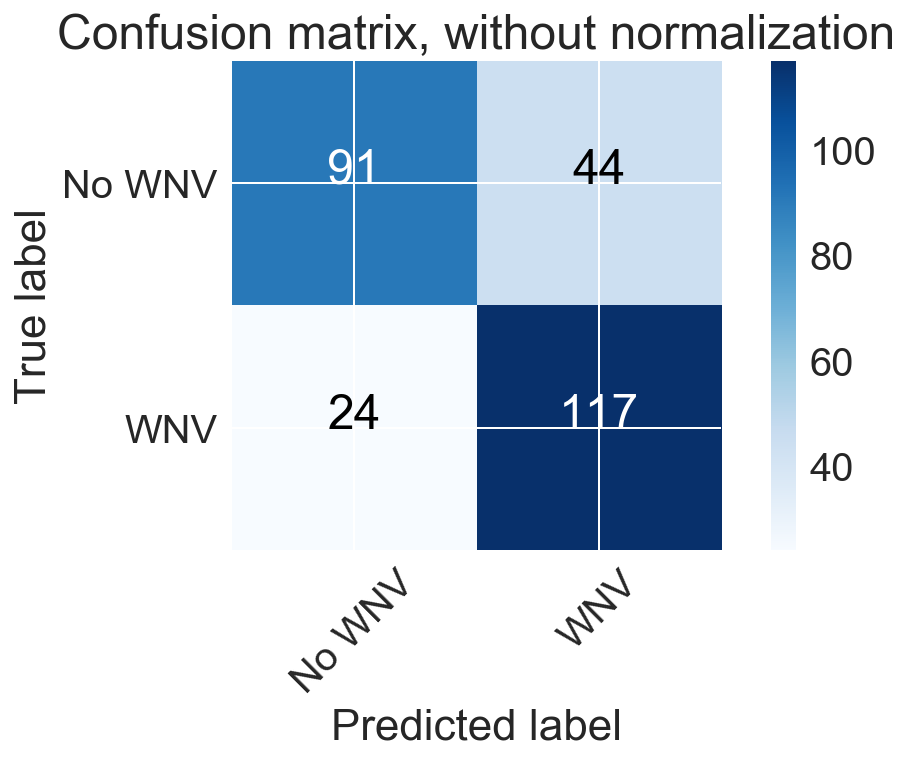

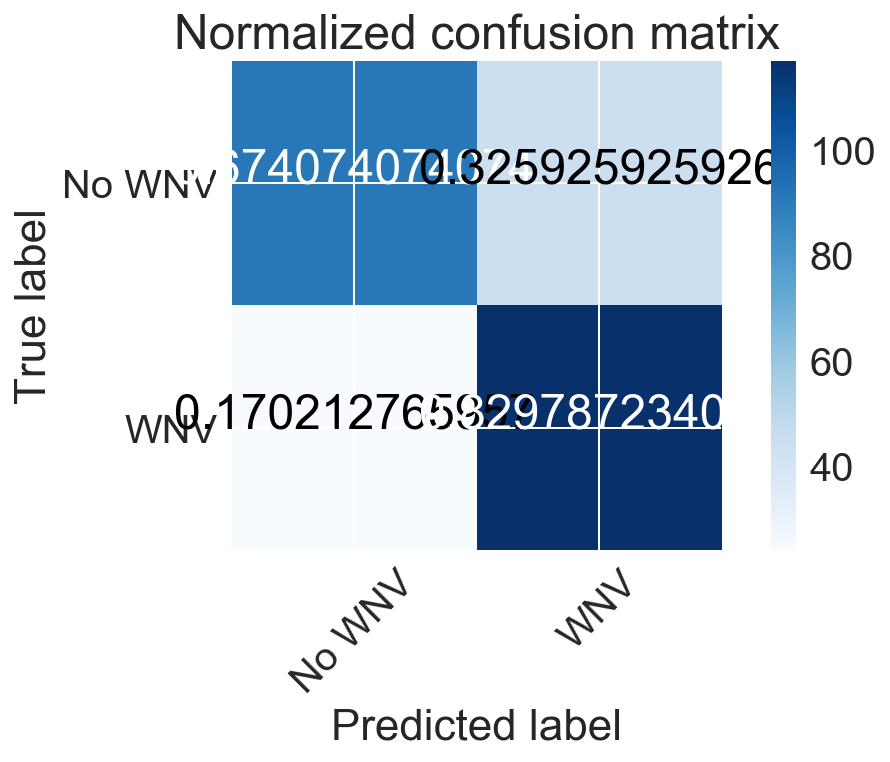

In [184]:
import itertools
print(__doc__)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Print classifier score
print classifier, ' SVM Classifier: ', cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy').mean(), '\n', '\n'

# Print Accuracy and Precision
print 'Accuracy: ', accuracy_score(y_test, y_pred, normalize=True)
print 'Precision: ', precision_score(y_test, y_pred, average='macro')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [138]:
X = balance.drop('WnvPresent', 1)
y = balance.WnvPresent

In [194]:
svm_lin = svm_cm(X, y, 'linear')


linear SVM Classifier:  0.734879227053
[[100  40]
 [ 35 101]]
Accuracy:  0.728260869565
Precision:  0.728526398739

             precision    recall  f1-score   support

          0       0.74      0.71      0.73       140
          1       0.72      0.74      0.73       136

avg / total       0.73      0.73      0.73       276



In [140]:
svm_rbf = svm_cm(X, y, 'rbf')

rbf SVM Classifier:  0.697351778656
[[101  36]
 [ 37 102]]
Accuracy:  0.735507246377
Precision:  0.735507246377

             precision    recall  f1-score   support

          0       0.73      0.74      0.73       137
          1       0.74      0.73      0.74       139

avg / total       0.74      0.74      0.74       276



In [173]:
svm_rbf.coef0

0.0

In [188]:
important_words2 = pd.DataFrame(svm_lin.coef_)
coef = np.array(important_words2[0:])

coef = coef.transpose()
from matplotlib import pyplot

In [189]:
important_words2 = pd.DataFrame(coef,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
important_words2

,importance
Sunrise,3.823964
Sunset,2.147172
Trap_T230,1.582710
Species_CULEX PIPIENS,1.093213
Trap_T223,1.074217
Trap_T090,1.018630
Trap_T221,1.000000
Trap_T903,0.930159
Species_CULEX PIPIENS/RESTUANS,0.916640
Trap_T086,0.752979


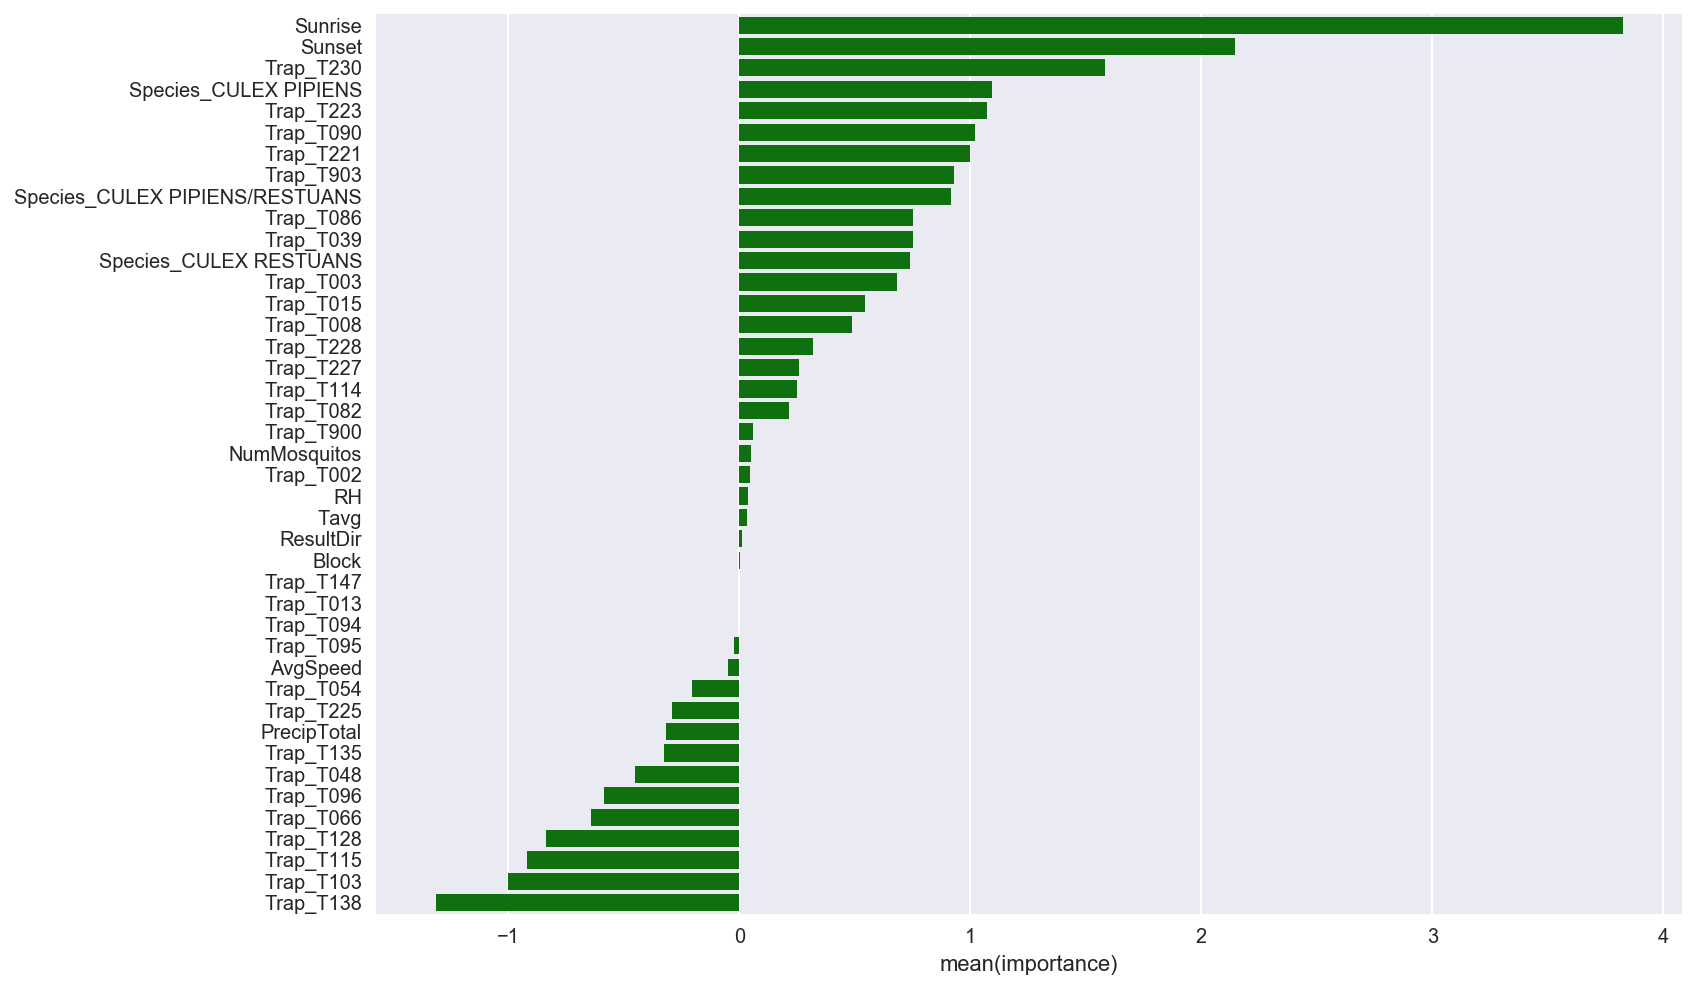

In [191]:
sns.set(font_scale=1)
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax = sns.barplot(y=important_words2.index, x=important_words2.importance, data=important_words2, color='g', orient='h', label='big')

In [ ]:
feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feat_imp = feature_importances[feature_importances['importance'] > 0]
feat_imp.plot(kind='bar', title='Feature Importances', label='big')
plt.ylabel('Feature Importance Score')

In [241]:
# For a single-input model with 2 classes (binary classification):
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(153,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train)

Epoch 1/10


KeyError: '[420 608 725 433 152 648 628 610 278 730 212 576  19 542 692 445 757 175\n 481  63 354 516 246 242  46 634 294 234 405  94  10 735] not in index'

In [225]:
826/14.

59.0